---
title: "Modul 5 Sains Data: Clustering"
subtitle: K-Mean Clustering, Hierarchical Clustering (Agglomerative)"
image: static\clustering.jpg
description: "Online Melalui Zoom"
date: 04/10/2025
page-navigation: true
format: html
---

Kembali ke [Sains Data](./saindat2025genap.qmd)

Pada modul ini kita akan membahas model clustering yang termasuk dalam kategori unsupervised learning (data tidak memiliki label). Inti dari clustering adalah kita ingin membagi populasi atau titik data ke dalam sejumlah kelompok sedemikian sehingga titik data dalam kelompok yang sama lebih mirip dengan titik data lain dalam kelompok yang sama dan berbeda dengan titik data dalam kelompok lain. Pada dasarnya, ini adalah kumpulan objek berdasarkan kesamaan dan ketidaksamaan di antara mereka.

- Cluster : sekelompok objek yang memiliki kesamaan dengan objek yang ada di cluster tersebut dan berbeda dengan objek di cluster lainnya
- Aplikasi : rekomendasi film/musik pada aplikasi, iklan pada sosmed, dll.

![](./static/clustering.jpg)

Semakin jauh jarak antar cluster, maka semakin baik data yang dikelompokkan. Semakin dekat data di dalam satu cluster, maka semakin baik cluster tersebut. Perhatikan bahwa karena clustering merupakan unsupervised learning, maka tidak ada yang namanya ground truth, tidak ada benar-salah. Jadi clustering **tidak memiliki akurasi atau error**. Sehingga nantinya diperlukan metode yang berbeda dari yang kita sudah pelajari sebelumnya untuk mengevaluasi hasil clustering yang kita buat.

berbagai pendekatan dalam clustering:

![](static/tipe-clustering.png)

- Hard Clustering: Sebuah objek hanya dapat dikelompokkan ke dalam satu group/cluster. Contoh k-Means.
- Soft Clustering: Sebuah objek dapat dikelompokkan ke lebih dari satu group/cluster. Contoh LDA (Topic Modelling).

Pada modul ini kita hanya akan membahas K-Means clustering dan Hierarchical Clustering.

# K-Means Clustering

K-Means merupakan salah satu metode clustering yang mempartisi data ke dalam bentuk satu atau lebih cluster/kelompok. Pada K-Means, data dengan karakteristik yang serupa akan dikelompokkan ke dalam satu cluster dan data yang memiliki karakteristik berbeda akan dikelompokkan ke dalam cluster lain. K-means clustering menggunakan rata-rata dan jarak antara data dan centroid untuk menentukan kluster.

**Langkah-Langkah:**

Misalkan kita memiliki dataset $X=\{x_1, x_2,..., x_n\}\subset\mathbb{R}^d$.

1. Tentukan jumlah $k$ (banyak cluster)
2. Inisialisasi centroid untuk setiap cluster secara acak, misalkan $\mu_1, \mu_2, ..., \mu_k\in \mathbb{R}^d$
3. menghitung jarak antara setiap data dan centroid dengan jarak euclidean
    $$ \|x_i-\mu_j\|^2 = \sum_{m=1}^d (x_{im}-\mu_{jm})^2,\hspace{3mm} \forall i = 1,2,..., n,\hspace{2mm} j = 1,2,...,k$$
4. Assign data ke dalam cluster dengan jarak antar data tersebut ke centroid paling dekat
    $$c_i := \arg\min_j \|x_i-\mu_j\|^2\hspace{3mm}\forall i=1,2,...,n$$
5. Menentukan centroid baru untuk setiap cluster dengan menjumlahkan semua nilai pada cluster yang sama dibagi jumlah data pada cluster tersebut
    $$\mu_j := \frac{1}{N_j}\sum_{\substack{i=1\\c_i=j}}^{N_j} x_i\hspace{3mm}\forall j=1,2,..., k$$
    dengan $N_j=$ banyaknya data di cluster $j$, 
6. Ulangi langkah 3 - 5 hingga tidak ada data yang berpindah ke cluster lain


## Import Module

In [2]:
#import modul yang diperlukan
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
%matplotlib inline

## Import Dataset

Kita akan melakukan clustering menggunakan dataset `modified_marketing_campaign.csv`. 

- [Direct link (langsung dari GitHub Pages ini)](./modified_marketing_campaign.csv)

In [25]:
#import modul dan membaca dataset
df = pd.read_csv('./modified_marketing_campaign.csv')

In [26]:
#cuplikan dataset
df.head()

Unnamed: 0     Education   Income  Kidhome  Teenhome  Recency  Wines  \
0           0      Graduate  58138.0        0         0       58    635   
1           1      Graduate  46344.0        1         1       38     11   
2           2      Graduate  71613.0        0         0       26    426   
3           3      Graduate  26646.0        1         0       26     11   
4           4  Postgraduate  58293.0        1         0       94    173   

   Fruits  Meat  Fish  ...  AcceptedCmp2  Complain  Response  \
0      88   546   172  ...             0         0         1   
1       1     6     2  ...             0         0         0   
2      49   127   111  ...             0         0         0   
3       4    20    10  ...             0         0         0   
4      43   118    46  ...             0         0         0   

        Customer_For  Age  Spent  Living_With  Children  Family_Size  \
0  57283200000000000   64   1617        Alone         0            1   
1   9763200000000000   67     27        Alone         2            3   
2  26956800000000000   56    776      Partner         0            2   
3  12009600000000000   37     53      Partner         1            3   
4  13910400000000000   40    422      Partner         1            3   

   Is_Parent  
0          0  
1          1  
2          0  
3          1  
4          1  

[5 rows x 31 columns]

In [27]:
#periksa tipe data dari masing masing kolom pada dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2212 entries, 0 to 2211
Data columns (total 31 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Unnamed: 0           2212 non-null   int64  
 1   Education            2212 non-null   object 
 2   Income               2212 non-null   float64
 3   Kidhome              2212 non-null   int64  
 4   Teenhome             2212 non-null   int64  
 5   Recency              2212 non-null   int64  
 6   Wines                2212 non-null   int64  
 7   Fruits               2212 non-null   int64  
 8   Meat                 2212 non-null   int64  
 9   Fish                 2212 non-null   int64  
 10  Sweets               2212 non-null   int64  
 11  Gold                 2212 non-null   int64  
 12  NumDealsPurchases    2212 non-null   int64  
 13  NumWebPurchases      2212 non-null   int64  
 14  NumCatalogPurchases  2212 non-null   int64  
 15  NumStorePurchases    2212 non-null   i

In [28]:
df = df.drop("Unnamed: 0", axis=1)

## Preprocessing dan Standarisasi

Lakukan label encoding untuk data kategorik

In [30]:
s = (df.dtypes == 'object')
object_cols = list(s[s].index)

print(object_cols)

['Education', 'Living_With']


In [ ]:
#Label Encoding
from sklearn.preprocessing import LabelEncoder
LE=LabelEncoder()
for i in object_cols:
    df[i]=df[[i]].apply(LE.fit_transform)

In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2212 entries, 0 to 2211
Data columns (total 30 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Education            2212 non-null   int32  
 1   Income               2212 non-null   float64
 2   Kidhome              2212 non-null   int64  
 3   Teenhome             2212 non-null   int64  
 4   Recency              2212 non-null   int64  
 5   Wines                2212 non-null   int64  
 6   Fruits               2212 non-null   int64  
 7   Meat                 2212 non-null   int64  
 8   Fish                 2212 non-null   int64  
 9   Sweets               2212 non-null   int64  
 10  Gold                 2212 non-null   int64  
 11  NumDealsPurchases    2212 non-null   int64  
 12  NumWebPurchases      2212 non-null   int64  
 13  NumCatalogPurchases  2212 non-null   int64  
 14  NumStorePurchases    2212 non-null   int64  
 15  NumWebVisitsMonth    2212 non-null   i

Selanjutnya akan dilakukan standarisasi, yaitu mengubah data supaya rata-ratanya adalah nol dan simpangan baku / *standard deviation* bernilai satu.

In [40]:
from sklearn.preprocessing import StandardScaler

In [ ]:
ds = df.copy()
cols_del = ['AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1','AcceptedCmp2', 'Complain', 'Response']
ds = ds.drop(cols_del, axis=1)
#Scaling
scaler = StandardScaler()
scaler.fit(ds)
scaled_ds = pd.DataFrame(scaler.transform(ds),columns= ds.columns )

In [42]:
scaled_ds.head()

Education    Income   Kidhome  Teenhome   Recency     Wines    Fruits  \
0  -0.893586  0.287105 -0.822754 -0.929699  0.310353  0.977660  1.552041   
1  -0.893586 -0.260882  1.040021  0.908097 -0.380813 -0.872618 -0.637461   
2  -0.893586  0.913196 -0.822754 -0.929699 -0.795514  0.357935  0.570540   
3  -0.893586 -1.176114  1.040021 -0.929699 -0.795514 -0.872618 -0.561961   
4   0.571657  0.294307  1.040021 -0.929699  1.554453 -0.392257  0.419540   

       Meat      Fish    Sweets  ...  NumCatalogPurchases  NumStorePurchases  \
0  1.690293  2.453472  1.483713  ...             2.503607          -0.555814   
1 -0.718230 -0.651004 -0.634019  ...            -0.571340          -1.171160   
2 -0.178542  1.339513 -0.147184  ...            -0.229679           1.290224   
3 -0.655787 -0.504911 -0.585335  ...            -0.913000          -0.555814   
4 -0.218684  0.152508 -0.001133  ...             0.111982           0.059532   

   NumWebVisitsMonth  Customer_For       Age     Spent  Living_With  Children  \
0           0.692181      1.527721  1.018352  1.676245    -1.349603 -1.264598   
1          -0.132545     -1.189011  1.274785 -0.963297    -1.349603  1.404572   
2          -0.544908     -0.206048  0.334530  0.280110     0.740959 -1.264598   
3           0.279818     -1.060584 -1.289547 -0.920135     0.740959  0.069987   
4          -0.132545     -0.951915 -1.033114 -0.307562     0.740959  0.069987   

   Family_Size  Is_Parent  
0    -1.758359  -1.581139  
1     0.449070   0.632456  
2    -0.654644  -1.581139  
3     0.449070   0.632456  
4     0.449070   0.632456  

[5 rows x 23 columns]

Dataset yang kita ingin gunakan masih memiliki 23 fitur. Kita bisa saja gunakan semua fitur untuk melakukan clustering, namun akan sulit untuk mendapatkan gambaran mengenai hasil cluster-nya. Selain itu saat bekerja dengan data berdimensi tinggi bisa muncul masalah yang disebut *curse of dimensionality*, yaitu berkurang kinerja algoritma akibat jumlah dimensi yang besar. 

Cara lain yang bisa digunakan ada dengan memilih dua fitur saja untuk melakukan clustering. Bisa langsung dipilih atau buat terlebih dahulu pairplot antar setiap fitur, kemudian amati pasangan fitur mana yang memiliki pola cluster.

<Figure size 640x480 with 0 Axes>

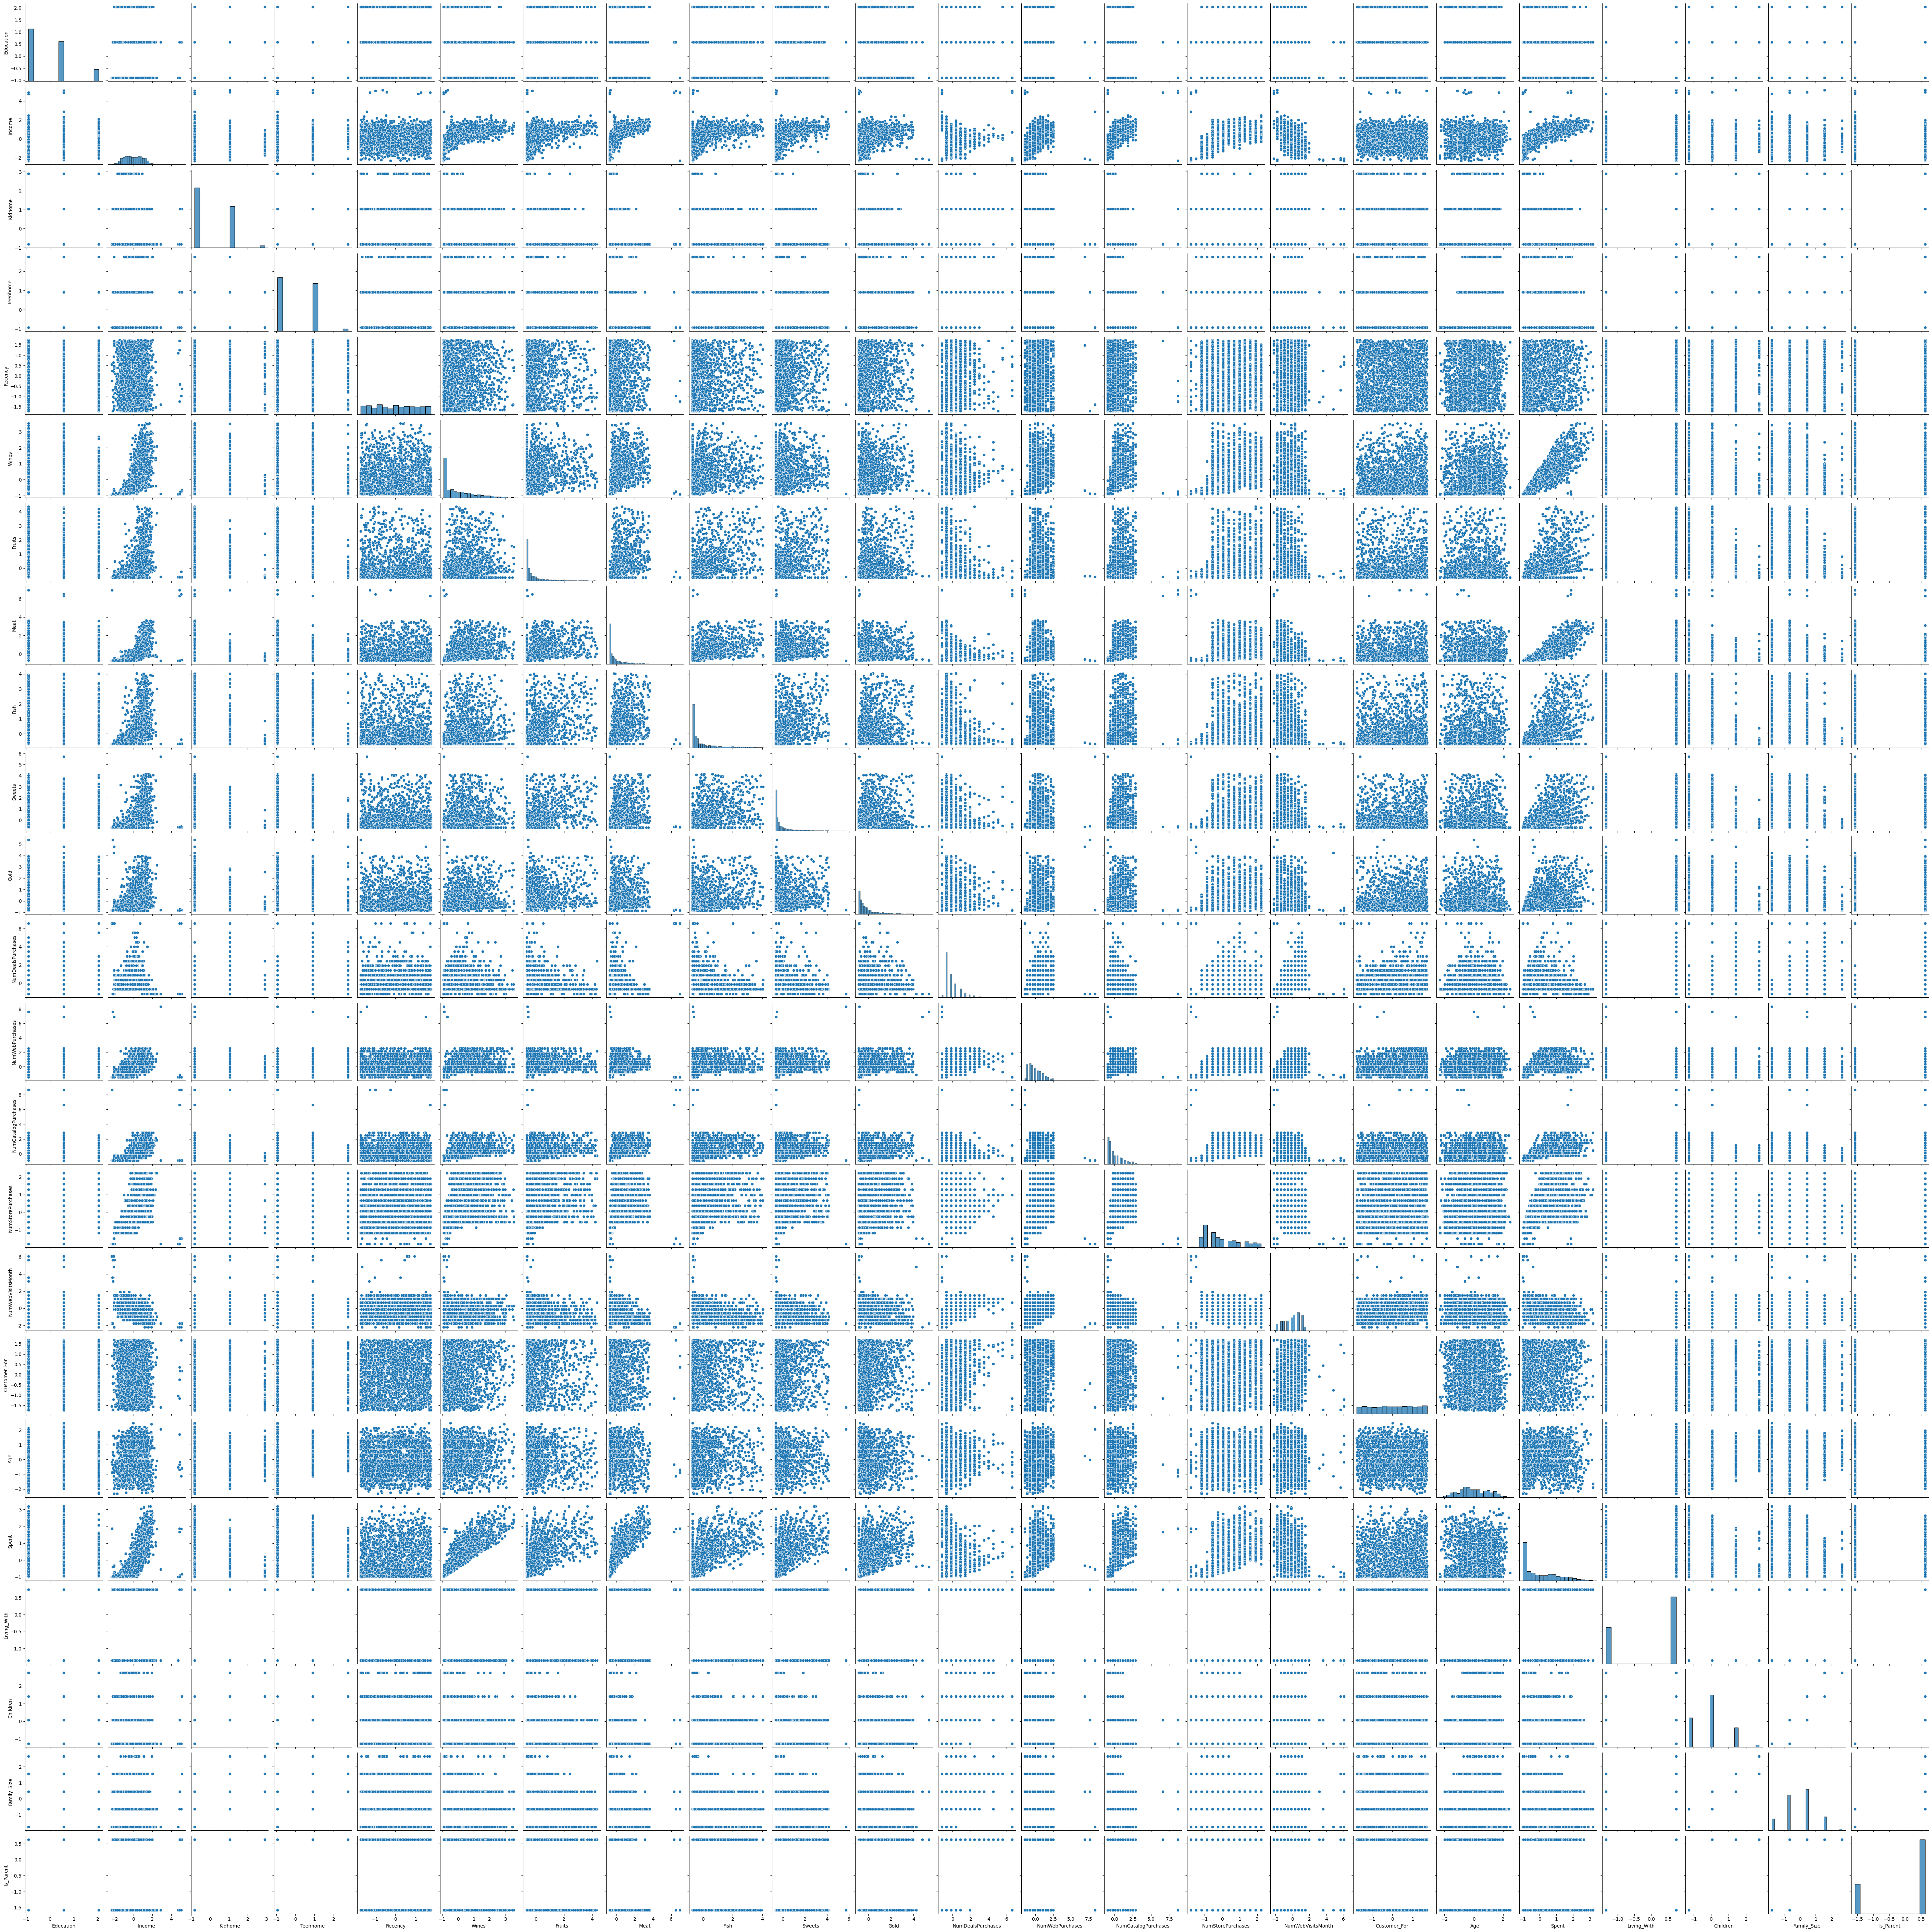

In [ ]:
plt.figure()
sns.pairplot(scaled_ds)
plt.show()

Selain itu bisa juga dilakukan reduksi dimensi. Pada modul ini kita hanya akan menggunakan metode ini.

## Principal Component Analysis (PCA) untuk Mereduksi Dimensi

Principal Component Analysis (PCA) adalah salah satu metode reduksi dimensi yang paling populer dan berbasis linier. PCA bertujuan untuk memproyeksikan data ke ruang berdimensi lebih rendah dengan cara mempertahankan sebanyak mungkin varian data asli.

Misalkan kita memiliki data $X \in \mathbb{R}^{n \times d}$, di mana:

- $n$ adalah jumlah observasi (data point),
- $d$ adalah jumlah fitur (dimensi).

Langkah-langkah dalam PCA adalah sebagai berikut:

1. Sentralisasi Data
    Hitung rata-rata tiap fitur:

    $$\mu = \frac{1}{n} \sum_{i=1}^n X_i$$

    Kurangi setiap baris $X_i$ dengan vektor rata-rata $\mu$:

    $$\tilde{X}_i = X_i - \mu$$

2. Hitung Matriks Kovariansi

    $$\Sigma = \frac{1}{n-1} \tilde{X}^\top \tilde{X}$$

3. Eigen-dekomposisi Matriks Kovariansi

    Cari eigenvalue dan eigenvector dari $\Sigma$:

    $$ \Sigma v = \lambda v $$

    Pilih $k$ eigenvector $v_1, \dots, v_k$ yang berkaitan dengan $k$ eigenvalue terbesar. Eigenvector ini membentuk basis dari ruang baru hasil reduksi.

4. Proyeksi Data ke Ruang Baru

    $$Z = \tilde{X} W_k$$

    dengan $W_k = [v_1, \dots, v_k] \in \mathbb{R}^{d \times k}$. Hasil $Z \in \mathbb{R}^{n \times k}$ merupakan representasi baru dari data dalam ruang berdimensi lebih rendah.

In [49]:
from sklearn.decomposition import PCA

In [80]:
#Initiating PCA to reduce dimentions aka features to 3
pca = PCA(n_components=2)
pca.fit(scaled_ds)
PCA_ds = pd.DataFrame(pca.transform(scaled_ds), columns=(["col1","col2"]))
PCA_ds.describe().T

count          mean       std       min       25%       50%       75%  \
col1  2212.0  2.569775e-17  2.878602 -5.978124 -2.539470 -0.781595  2.386380   
col2  2212.0  5.139550e-17  1.709469 -4.194757 -1.323929 -0.173721  1.234851   

           max  
col1  7.452915  
col2  6.168189

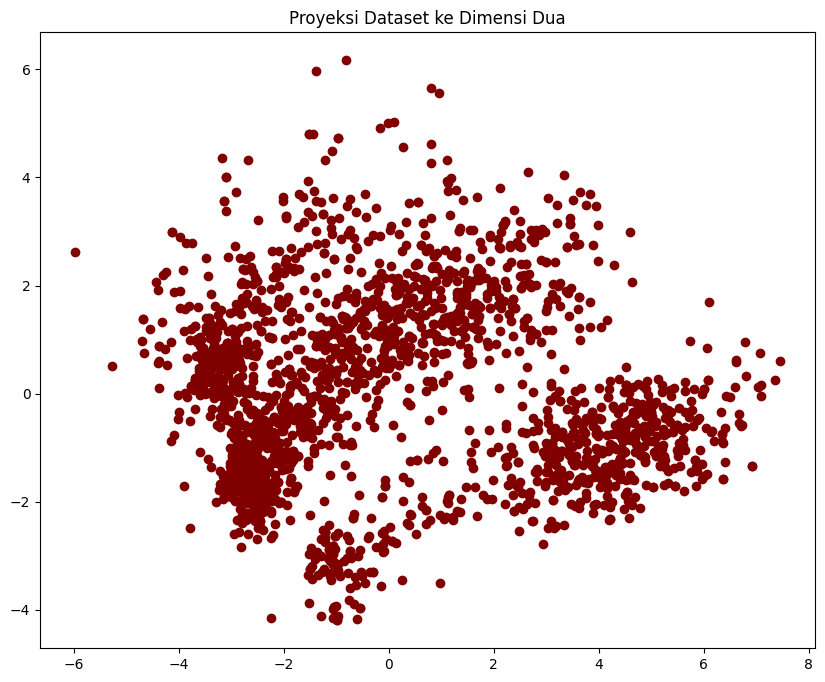

In [81]:
#A 3D Projection Of Data In The Reduced Dimension
x =PCA_ds["col1"]
y =PCA_ds["col2"]
#To plot
fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111)
ax.scatter(x,y, c="maroon", marker="o" )
ax.set_title("Proyeksi Dataset ke Dimensi Dua")
plt.show()

Perhatikan bahwa fitur pada dataset hasil proyeksi menggunakan PCA tidak memiliki makna interpretasi yang sama dengan fitur pada dataset awal. Sehingga perlu berhati-hati nanti dalam menginterpretasikan hasil clustering.

## Modelling

Sebelum membuat model, akan ditentukan nilai $k$ yang optimal

### Metode Elbow Untuk Mencari k Optimal

Metode elbow merupakan salah satu metode untuk menentukan jumlah cluster optimal $k$ dalam algoritma seperti K-Means, dengan mengamati diminishing return dari penurunan inertia atau within-cluster sum of squares (WCSS). Rumusnya:

$$WCSS(k) = \sum_{j=1}^k\sum_{x_i\in C_j}\|x_i-\mu_j\|^2$$

- Semakin besar $k$, semakin kecil WCSS, karena tiap cluster lebih spesifik.
- Titik "elbow" adalah nilai $k$ di mana penurunan WCSS mulai melambat drastis, yaitu:

    $$ \frac{\Delta WCSS(k)}{\Delta t}\text{ mulai mendatar}$$

    Titik ini dianggap sebagai jumlah cluster yang optimal. Jika dalam grafik, bentuknya menyerupai lengan tertekuk ("elbow"). Titik tekuk tersebut adalah titik optimal.

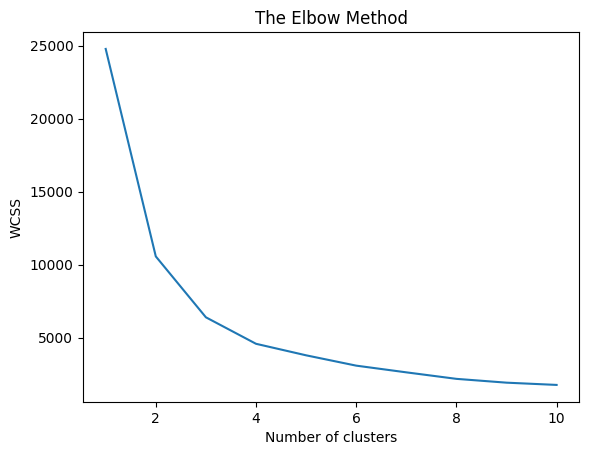

In [90]:
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42,n_init = 12)
    kmeans.fit(PCA_ds)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [91]:
wcss

[24782.29246642058,
 10561.555689265911,
 6388.300503858726,
 4573.348803260456,
 3783.3197835674255,
 3075.795248256612,
 2616.249160261786,
 2170.072259559425,
 1908.766932659063,
 1754.247195356655]

### Metode Silhouete Untuk Mencari k Optimal

Nilai Silhouette mengukur seberapa mirip sebuah titik dengan klasternya sendiri (kohesi) dibandingkan dengan klaster lain (pemisahan).
Kisaran nilai Silhouette adalah antara +1 dan -1. Nilai yang tinggi diinginkan dan mengindikasikan bahwa titik tersebut ditempatkan pada klaster yang benar. Jika banyak titik yang memiliki nilai Silhouette negatif, hal ini dapat mengindikasikan bahwa kita telah membuat terlalu banyak atau terlalu sedikit cluster. Untuk setiap data point $x_i$, definisikan:

- $a(i)$: rata-rata jarak antara $x_i$ dan semua titik lain dalam **cluster yang sama**.
- $b(i)$: **rata-rata jarak minimum** dari $x_i$ ke semua titik dari **cluster terdekat (bukan miliknya)**.

Lalu **silhouette coefficient** dari $x_i$ adalah:

$$
s(i) = \frac{b(i) - a(i)}{\max\{a(i), b(i)\}} \in [-1, 1]
$$

Interpretasi:

- $s(i) \approx 1$: $x_i$ berada dalam cluster yang **kompak dan jauh dari cluster lain**.
- $s(i) \approx 0$: $x_i$ berada **dekat dengan batas antara dua cluster**.
- $s(i) < 0$: $x_i$ **salah tempat** (lebih dekat ke cluster lain daripada cluster-nya sendiri).

Untuk keseluruhan data:
$$
S(k) = \frac{1}{n} \sum_{i=1}^n s(i)
$$

Nilai $S(k)$ dihitung untuk berbagai nilai $k$. Nilai $k$ dengan **rata-rata silhouette terbesar** dianggap optimal.

In [93]:
from sklearn.metrics import silhouette_score

In [94]:
for i in range(2,11):
  labels=KMeans(init = 'k-means++',n_clusters=i,random_state=42,n_init = 12).fit(PCA_ds).labels_
  print ("Silhouette score for k (clusters) = "+str(i)+" is "+str(silhouette_score(PCA_ds,labels,metric="euclidean",sample_size=1000,random_state=42)))

Silhouette score for k (clusters) = 2 is 0.5155057141116259
Silhouette score for k (clusters) = 3 is 0.5043335585699166
Silhouette score for k (clusters) = 4 is 0.4665180620844028
Silhouette score for k (clusters) = 5 is 0.4476821353324842
Silhouette score for k (clusters) = 6 is 0.4637406057928928
Silhouette score for k (clusters) = 7 is 0.427543822853253
Silhouette score for k (clusters) = 8 is 0.44654091818118036
Silhouette score for k (clusters) = 9 is 0.4342829258000376
Silhouette score for k (clusters) = 10 is 0.43290048366845174


### Membuat Model K-Means dengan k optimal

In [96]:
kmeans = KMeans(n_clusters = 2, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(PCA_ds)

In [98]:
y_kmeans

array([0, 1, 0, ..., 0, 0, 1])

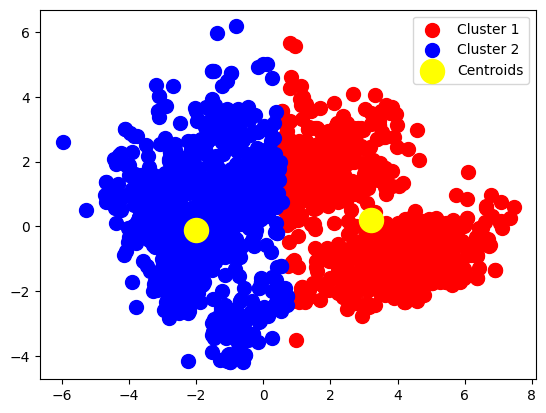

In [100]:
PCA_array = PCA_ds.to_numpy()
plt.scatter(PCA_array[y_kmeans == 0, 0], PCA_array[y_kmeans == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(PCA_array[y_kmeans == 1, 0], PCA_array[y_kmeans == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = 'yellow', label = 'Centroids')
plt.legend()
plt.show()

In [101]:
kmeans.cluster_centers_

array([[ 3.21590733,  0.19516567],
       [-1.99169663, -0.12087127]])

In [102]:
kmeans.labels_

array([0, 1, 0, ..., 0, 0, 1])

# Hierarchical Clustering

Hierarchical clustering adalah keluarga umum dari algoritma clustering yang membangun cluster bersarang dengan menggabungkan atau memisahkannya secara berurutan. Hirarki cluster ini direpresentasikan sebagai sebuah pohon (atau dendogram). Akar dari pohon adalah cluster unik yang mengumpulkan semua sampel, sedangkan daunnya adalah cluster yang hanya memiliki satu sampel.

Objek Agglomerative Clustering melakukan pengelompokan hirarkis menggunakan pendekatan dari bawah ke atas: setiap pengamatan dimulai dari klasternya sendiri, dan klaster-klaster tersebut digabungkan secara berurutan. Kriteria keterkaitan menentukan metrik yang digunakan untuk strategi penggabungan:


- Ward meminimalkan jumlah perbedaan kuadrat di dalam semua cluster. Ini adalah pendekatan yang meminimalkan varians dan dalam hal ini mirip dengan fungsi objektif k-means tetapi ditangani dengan pendekatan hirarki aglomeratif.

- Maximum atau complete linkage meminimalkan jarak maksimum antara pengamatan dari pasangan cluster.

- Average linkage meminimalkan rata-rata jarak antara semua pengamatan dari pasangan cluster.

- Single linkage meminimalkan jarak antara pengamatan terdekat dari pasangan cluster.

Agglomerative Clustering juga dapat menskalakan ke sejumlah besar sampel ketika digunakan bersama dengan matriks konektivitas, tetapi secara komputasi mahal ketika tidak ada batasan konektivitas yang ditambahkan di antara sampel: ia mempertimbangkan pada setiap langkah semua kemungkinan penggabungan.

## Menggunakan Dendogram Untuk Mencari $k$ Optimal

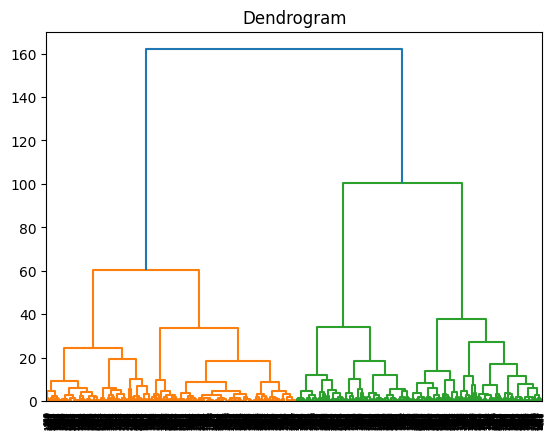

In [104]:
import scipy.cluster.hierarchy as sch
dendrogram = sch.dendrogram(sch.linkage(PCA_ds, method = 'ward'))
plt.title('Dendrogram')
plt.show()

## Modelling

In [106]:
from sklearn.cluster import AgglomerativeClustering
hc = AgglomerativeClustering(n_clusters = 2, linkage = 'ward')
y_hc = hc.fit_predict(PCA_ds)

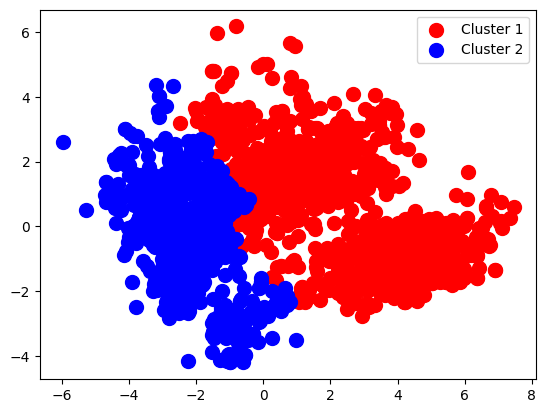

In [108]:
plt.scatter(PCA_array[y_hc == 0, 0], PCA_array[y_hc == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(PCA_array[y_hc == 1, 0], PCA_array[y_hc == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.legend()
plt.show()